In [1]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Iniciando programa
MNIST carregado!


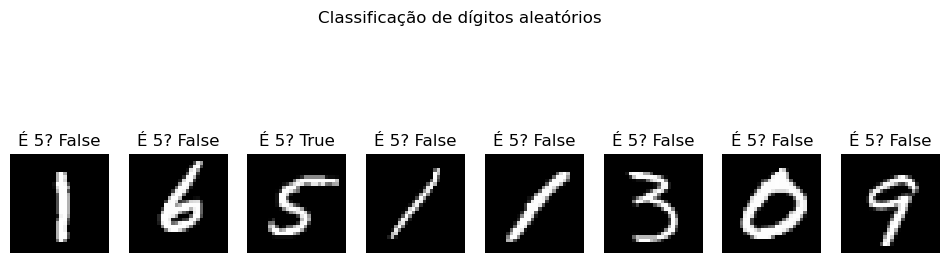

In [2]:
# 1. Carregar MNIST
print("Iniciando programa")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
print("MNIST carregado!")

X, y = mnist["data"], mnist["target"].astype(np.uint8)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# 2. Classificação binária (é 5?)
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

# 3. Treina o modelo
clf = SGDClassifier(random_state=42)
clf.fit(X_train, y_train_5)

# 4. Testar de 5 a 10 imagens aleatórias
num_imgs = np.random.randint(5, 11)  # número aleatório entre 5 e 10
random_indices = np.random.randint(0, len(X_test), size=num_imgs)

# 5. Coletar amostras e fazer predições
samples = X_test[random_indices]
predictions = clf.predict(samples)

# 6. Mostrar imagens com os resultados
plt.figure(figsize=(12, 4))
for i, (img, pred, idx) in enumerate(zip(samples, predictions, random_indices)):
    plt.subplot(1, num_imgs, i + 1)
    plt.imshow(img.reshape(28, 28), cmap="gray")
    plt.title(f"É 5? {pred}")
    plt.axis("off")

plt.suptitle("Classificação de dígitos aleatórios")
plt.show()

Matriz de confusão:
[[8707  401]
 [ 107  785]]


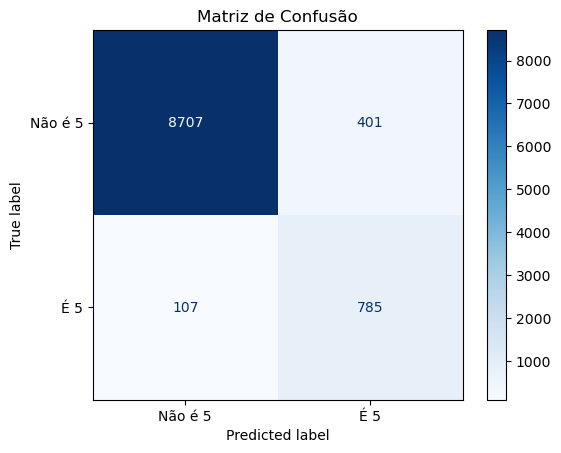

In [3]:
## MATRIZ DE CONFUSÃO
# Previsões
y_pred = clf.predict(X_test)

# Matriz de confusão (classe real x predita)
matriz = confusion_matrix(y_test_5, y_pred)

# Exibir numericamente
print("Matriz de confusão:")
print(matriz)

# Exibir visualmente
disp = ConfusionMatrixDisplay(matriz, display_labels=["Não é 5", "É 5"])
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão")
plt.show()

# Fórmulas
### Precisão
Das vezes que o modelo disse "é 5", quantas ele acertou?
- Quando utilizar?
    Você não quer falsos positivos(ex: sistema judicial, alertas falsos)

PRECISAO = TP / TP + FP

### Revocação ( Recall ou Sensibilidade)
Das vezes que realmente era "5", quantas ele acertou?
- Quando utilizar?
    Você não pode perder positivos reais(ex: câncer, fraude, incêndio)

REVOCACAO = TP / TP + FN

### F1-score (Equilíbrio entre precisão e revocação)
- Quando utilizar?
    Quer um equilibrio entre precisão e revocação, especialmente em classes desbalanceadas.
    
![alt text](image.png)

In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Previsões no conjunto de teste
y_pred = clf.predict(X_test)

# Métricas
precisao = precision_score(y_test_5, y_pred)
revocacao = recall_score(y_test_5, y_pred)
f1 = f1_score(y_test_5, y_pred)

print(f"Precisão: {precisao:.4f}")
print(f"Revocação: {revocacao:.4f}")
print(f"F1-score: {f1:.4f}")


Precisão: 0.6619
Revocação: 0.8800
F1-score: 0.7555


# Trade-off entre precisão e revocação
A maioria dos classificadores, como o SGDClassifier, faz previsões baseadas em pontuações (scores), e não apenas "sim ou não". Por exemplo:

´´´clf.decision_function([amostra])´´´

Essa função retorna um valor contínuo. O Scikit-Learn, por padrão, usa threshold = 0 para decidir:

- Se score ≥ 0 → classe positiva (“é 5”)

- Se score < 0 → classe negativa (“não é 5”)

### Se mudarmos esse threshold...
' podemos "forçar" o modelo a ser mais cauteloso ou mais ousado.

- Se exigirmos score >= +1, ele só diz que é 5 se tiver muita certeza (+ precisão, - revocação)

- Se aceitarmos score >= -1, ele marca "é 5" mesmo sem tanta certeza (- precisão, + revocação)

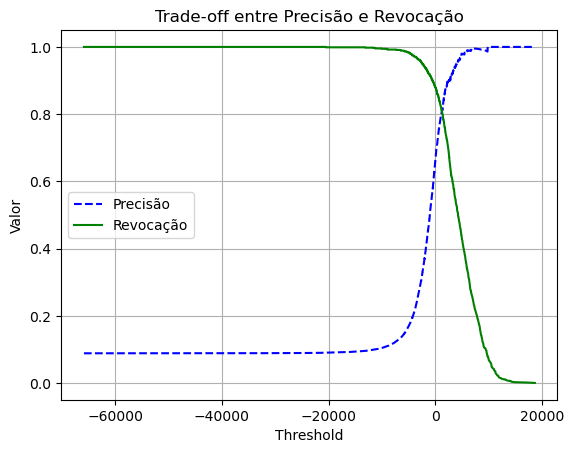

In [6]:
from sklearn.metrics import precision_recall_curve
# Obtemos os scores de decisão para todo o conjunto de teste 
scores = clf.decision_function(X_test)

# Calculamos os valores de precisão e revocação em vários thresholds
precisions,recalls,thresholds = precision_recall_curve(y_test_5,scores)

# Plotando
plt.plot(thresholds, precisions[:-1], "b--", label="Precisão")
plt.plot(thresholds, recalls[:-1], "g-", label="Revocação")
plt.xlabel("Threshold")
plt.ylabel("Valor")
plt.title("Trade-off entre Precisão e Revocação")
plt.legend()
plt.grid(True)
plt.show()

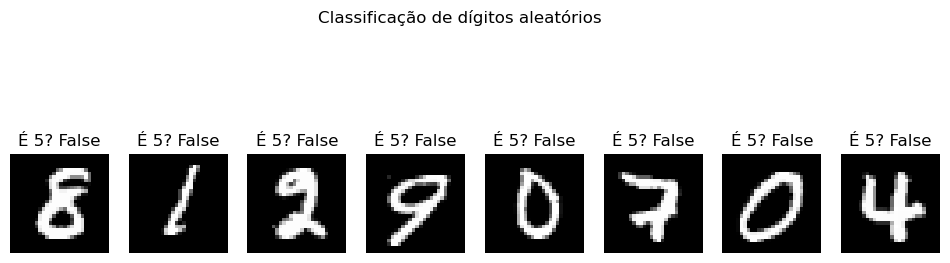

Threshold: 1.025
Precisão: 0.0000
Revocação: 0.0000
F1-score: 0.0000


In [37]:
## ALTERANDO O THRESHOLD DO NOSSO EXEMPLO DE CLASSIFICAÇÃO
random_indices = np.random.randint(0, len(X_test), size=num_imgs)
# y reais para os samples aleatórios
y_real = y_test_5[random_indices]

# 5. Coletar amostras e fazer predições
samples = X_test[random_indices]
# 5. Coletar amostras e fazer predições
scores = clf.decision_function(samples)

# 5.5 Escolhe o threshold desejado
thresholds = 1.025
predictions = scores > thresholds

# 6. Mostrar imagens com os resultados
plt.figure(figsize=(12, 4))
for i, (img, pred, idx) in enumerate(zip(samples, predictions, random_indices)):
    plt.subplot(1, num_imgs, i + 1)
    plt.imshow(img.reshape(28, 28), cmap="gray")
    plt.title(f"É 5? {pred}")
    plt.axis("off")

plt.suptitle("Classificação de dígitos aleatórios")
plt.show()

# Calcular métricas com base nas novas previsões 
precisao = precision_score(y_real, predictions, zero_division=0)
revocacao = recall_score(y_real, predictions, zero_division=0)
f1 = f1_score(y_real, predictions, zero_division=0)


# Exibir resultados
print(f"Threshold: {thresholds}")
print(f"Precisão: {precisao:.4f}")
print(f"Revocação: {revocacao:.4f}")
print(f"F1-score: {f1:.4f}")
